## Superstore Analysis

### Importing libraries 

In [111]:
import pandas as pd
import statsmodels.api as sm

### Reading and cleaning data

In [112]:
df = pd.read_csv("../data/Superstore.csv", encoding="cp1252")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [113]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


cheking for missing values

In [114]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Analysis

#### Profitability of products and categories

Let's try to answer:
- Which products and product categories generate the most sales and profit?

Sales and Profit by Category: Sub-categories Ranked by Profitability

In [115]:
df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(["Category", "Profit"], ascending=[False, False])

Sales      Profit
Category        Sub-Category                         
Technology      Copiers       149528.0300  55617.8249
                Phones        330007.0540  44515.7306
                Accessories   167380.3180  41936.6357
                Machines      189238.6310   3384.7569
Office Supplies Paper          78479.2060  34053.5693
                Binders       203412.7330  30221.7633
                Storage       223843.6080  21278.8264
                Appliances    107532.1610  18138.0054
                Envelopes      16476.4020   6964.1767
                Art            27118.7920   6527.7870
                Labels         12486.3120   5546.2540
                Fasteners       3024.2800    949.5182
                Supplies       46673.5380  -1189.0995
Furniture       Chairs        328449.1030  26590.1663
                Furnishings    91705.1640  13059.1436
                Bookcases     114879.9963  -3472.5560
                Tables        206965.5320 -17725.4811

Category Sales and Profit in descending order

In [116]:
df.groupby(by="Category")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741999.7953,18451.2728


Sub-Category sales and profit in descending order

In [117]:
df.groupby(by="Sub-Category")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


#### Multiple Linear Regression: Determinants of Profit Margin

**Objective:** The primary objective of this model is to identify and analyze the factors that explain the variance in Profit Margin. We employ a Multiple Linear Regression (OLS) approach, which allows us to estimate the individual effect of each predictor while holding all other variables constant. We want to see how these different things work together. The formula for our model is: $$\text{Profit Margin} \sim \text{Quantity} + \text{Discount} + \text{Segment} + \text{Category} + \text{Region}$$

Profit margin measures how much of the sales remains as profit after costs

In [118]:
df["Profit margin"] = df["Profit"] / df["Sales"]

Dependent variable

In [119]:
y = df[["Profit margin"]]

Explanatory variables

In [ ]:
X_numeric = df[["Quantity", "Discount"]]

X_categorical = pd.get_dummies(df[["Segment", "Category", "Region"]], drop_first=True, dtype=int)

X = pd.concat([X_numeric, X_categorical], axis=1)
# add a constant for linear regression
X = sm.add_constant(X)

Linear regression model

In [121]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profit margin   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3443.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        21:56:59   Log-Likelihood:                 489.52
No. Observations:                9994   AIC:                            -959.0
Df Residuals:                    9984   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3024      0.008     35.759      0.000       0.286       0.319
Quantity                     0.0004      0.001      0.339      0.735      -0.002       0.002
Discount                    -1.9158      0.012   -166.210      0.000      -1.938      -1.893
Segment_Corporate            0.0082      0.005      1.563      0.118      -0.002       0.019
Segment_Home Office          0.0103      0.006      1.621      0.105      -0.002       0.023
Category_Office Supplies     0.0678      0.006     11.646      0.000       0.056       0.079
Category_Technology          0.0375      0.007      5.096      0.000       0.023       0.052
Region_East                  0.0898      0.007     13.734      0.000       0.077       0.103
Region_South                 0.0891      0.008     11.813      0.000       0.074       0.104
Region_West                  0.0737      0.006     11.399      0.000       0.061       0.086
==============================================================================
Omnibus:                     3968.620   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33725.515
Skew:                          -1.678   Prob(JB):                         0.00
Kurtosis:                      11.350   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Summary and Coefficient analysis

The model explains approximately 76% of the variance in the profit margin. This is a strong result, indicating that the selected variables are key drivers of profitability.
- **Discount:** 10% increase in discount decreases profit margin by -19.2 %

- **Category (Office Supplies & Technology)** Both categories are statistically significant and positive relative to the baseline (Furniture). Office Supplies (coef: 0.0678) is the most profitable category when other factors are held constant.

- **Quantity:** The coefficient is near zero (0.0004) with a p-value of 0.735 meaning that the number of products in an order does not have a statistically significant impact on the profit margin. Therefore, increasing sales volume does not compensate for poor pricing or over-discounting.

- **P-values** Almost all variables demonstrated strong statistical significance ($p < 0.001$), with the exceptions of Quantity and certain Segments, indicating a robust relationship with the dependent variable.

#### Regression plot Discount vs. Profit Margin

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

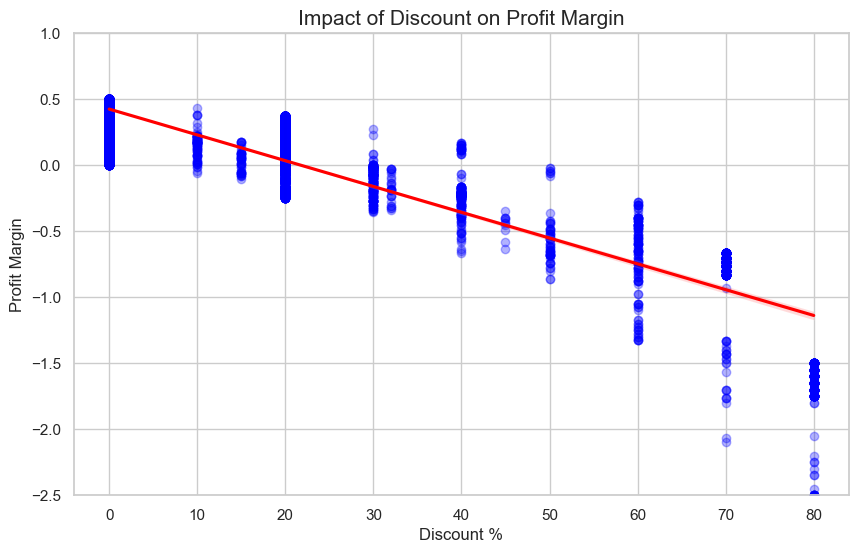

In [123]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.regplot(x=df['Discount']*100, y=df['Profit margin'], 
            scatter_kws={'alpha':0.3, 'color':'blue'}, 
            line_kws={'color':'red'})

plt.title('Impact of Discount on Profit Margin', fontsize=15)
plt.xlabel('Discount %', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)

plt.ylim(-2.5, 1) 

plt.show()

Profitability drops significantly once discounts exceed 20%. Beyond this threshold, the majority of transactions result in a net loss regardless of the region or customer segment.